# An Tutorial how to pack historical information into pandas DataFrames

Before starting this tutorial you should have already downloaded the recent data into `recent`

In [30]:
import sys
print(sys.path)
sys.path.append("/".join(sys.path[0].split("/")[:-1]))

import matplotlib.pyplot as plt

from studies.utils.recent import set_errors_to_zeros
from studies.utils.recent import get_recent



['/home/robin/lectures/DataLiteracy/studies', '/home/robin/miniconda3/envs/DataLiteracy/lib/python311.zip', '/home/robin/miniconda3/envs/DataLiteracy/lib/python3.11', '/home/robin/miniconda3/envs/DataLiteracy/lib/python3.11/lib-dynload', '', '/home/robin/miniconda3/envs/DataLiteracy/lib/python3.11/site-packages', '/home/robin/lectures/DataLiteracy', '/home/robin/lectures/DataLiteracy']


In [31]:
data_root_directory = "../data/dwd/recent"
n_last_days = 14

In [32]:


precipitation = get_recent("precipitation")
temperature = get_recent("air_temperature")

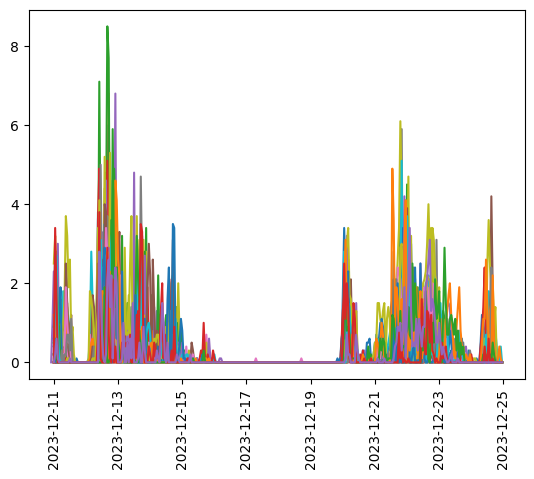

In [33]:
# find unique station ids:


fig, ax = plt.subplots()

unique_station_ids = precipitation["STATIONS_ID"].unique()
for station_id in unique_station_ids:
    sub_frame = precipitation[precipitation["STATIONS_ID"] == station_id]
    ax.plot(
        sub_frame["MESS_DATUM"][-(n_last_days * 24) :],
        sub_frame["  R1"].apply(set_errors_to_zeros)[-(n_last_days * 24) :],
        label=station_id,
    )

ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=90)


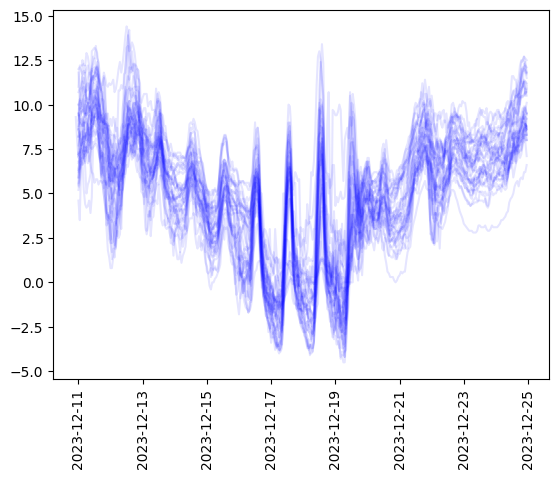

In [34]:
fig, ax = plt.subplots()
unique_station_ids = temperature["STATIONS_ID"].unique()
for station_id in unique_station_ids:
    sub_frame = temperature[temperature["STATIONS_ID"] == station_id]
    ax.plot(sub_frame["MESS_DATUM"][-(n_last_days * 24):], sub_frame["TT_TU"].apply(set_errors_to_zeros)[-(n_last_days * 24):], label=station_id, color="b", alpha=0.1)

ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=90)


Same thing but in polar

/tmp/ipykernel_6159/2181981697.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_temperature["TT_TU"] = single_temperature["TT_TU"].apply(set_errors_to_zeros)


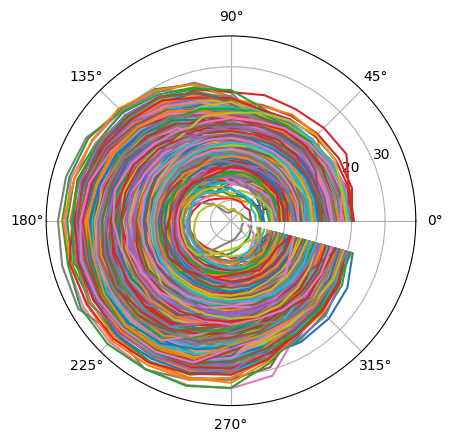

In [35]:
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(projection="polar")

station_id = 755
single_temperature = temperature[temperature["STATIONS_ID"] == station_id]

single_temperature["TT_TU"] = single_temperature["TT_TU"].apply(set_errors_to_zeros)

array = single_temperature.to_numpy()[:, [1, 3]]
array = np.reshape(array, (len(array) // 24, 24, 2))

for ele in array:
    time, value = ele.T
    hour = np.array([t.hour for t in time])
    rad = hour / 24 * 2 * np.pi
    ax.plot(rad, value)